## Get results in json :

In [8]:
from getdict_results import *

algo_folder="reactiveGRASP/countcost_nostage"
exp="exp3"
seed=5
Nin=15
qli=80
Nout=5
iteration_number = 2
iter_to_plot = iteration_number
nb_iter=28

In [2]:
results = getiterfromfileHEUR(Nin,Nout,seed,qli,algo_folder,exp)
results

{1: {'x': {1: {1: 15, 2: 13},
   2: {1: 16, 2: 8},
   3: {1: 5, 2: 8, 3: 8},
   4: {1: 9, 2: 6, 3: 17},
   5: {1: 13, 2: 13, 3: 10},
   6: {1: 20, 2: 5, 3: 1},
   7: {1: 4, 2: 20},
   8: {1: 16, 2: 2, 3: 13},
   9: {1: 3, 2: 13, 3: 12},
   10: {1: 1, 2: 5, 3: 12},
   11: {1: 13, 2: 1},
   12: {1: 13, 2: 3, 3: 5},
   13: {1: 17, 2: 5},
   14: {1: 16, 2: 1},
   15: {1: 15, 2: 1, 3: 4},
   16: {1: 5.0},
   17: {1: 12.0},
   18: {1: 1.0},
   19: {1: 12.0},
   20: {1: 9.0},
   21: {1: 16.0},
   22: {1: 5.0},
   23: {1: 9.0},
   24: {1: 5.0},
   25: {1: 12.0},
   26: {1: 16.0},
   27: {1: 16.0},
   28: {1: 9.0},
   29: {1: 5.0},
   30: {1: 12.0}},
  'y': {1: {1: 0, 2: 41},
   2: {1: 21, 2: 82},
   3: {1: 19, 2: 101, 3: 139},
   4: {1: 10, 2: 47, 3: 68},
   5: {1: 0, 2: 46, 3: 69},
   6: {1: 0, 2: 44, 3: 138},
   7: {1: 10, 2: 62},
   8: {1: 10, 2: 36, 3: 59},
   9: {1: 0, 2: 101, 3: 151},
   10: {1: 19, 2: 72, 3: 116},
   11: {1: 23, 2: 65},
   12: {1: 12, 2: 52, 3: 79},
   13: {1: 23, 2: 60

## Get vizualization from the sol 

In [11]:
from make_graphs import *
getgraphs_port(algo_folder, exp, seed,Nin,Nout,qli)

FileNotFoundError: [Errno 2] No such file or directory: 'D:/DTU-Courses/DTU-Thesis/berth_allocation/benchmarks_CPLEX/sols/CPLEX_sol_5_15_5_80.csv'

## Cost analysis

- The cost of each visit in a bar graph with colors for each type of cost
- Looking at the time evolution (along iter) for the heuristic and the local search
- Same thing for the when evolution for each visit
- Same thing for the proba

--> Put everything, per solution and per iteration in a dataset.... (could use r)

In [3]:
results[1]['delay_cost_visit'][1]

{1: 75, 2: 2178}

In [19]:
results[1]['inst'][2]

[3, 1, 2]

In [3]:
dataset = make_datasetiter(algo_folder=algo_folder, exp=exp, seed=seed,Nin=Nin,Nout=Nout,qli=qli)
for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit','n','c', 'when']:
    dataset[col] = dataset[col].astype(int)

In [4]:
dataset

,iter,n,c,port,cost_visit,delay_cost_visit,when,tacticall_chosen,tacticboat_chosen,penalty_visit,...,fuel_cost_solheur,cost_sollocal,delay_cost_sollocal,waiting_cost_sollocal,penalty_sollocal,handling_cost_sollocal,fuel_cost_sollocal,timeheur,timelocal,failed
0,1,1,1,2,24713,75,30,cost,cost,0,...,426840.0,1555871.0,304902.0,56691.0,585358.0,182505.0,426417.0,0.728,0.529,1.0
1,1,1,2,1,6630,2178,13,cost,cost,0,...,426840.0,1555871.0,304902.0,56691.0,585358.0,182505.0,426417.0,0.728,0.529,1.0
2,1,2,1,1,7442,3506,12,cost,cost,0,...,426840.0,1555871.0,304902.0,56691.0,585358.0,182505.0,426417.0,0.728,0.529,1.0
3,1,2,2,2,65135,14746,25,cost,cost,18306,...,426840.0,1555871.0,304902.0,56691.0,585358.0,182505.0,426417.0,0.728,0.529,1.0
4,1,3,1,3,41615,9280,15,cost,cost,0,...,426840.0,1555871.0,304902.0,56691.0,585358.0,182505.0,426417.0,0.728,0.529,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,28,14,1,2,164190,27503,48,reconstruct,cost,127352,...,431301.0,945669.0,173025.0,30499.0,134418.0,172854.0,434875.0,0.667,17.688,1.0
1088,28,14,2,1,188604,29274,49,reconstruct,cost,135160,...,431301.0,945669.0,173025.0,30499.0,134418.0,172854.0,434875.0,0.667,17.688,1.0
1089,28,15,1,3,28637,413,27,count,cost,0,...,431301.0,945669.0,173025.0,30499.0,134418.0,172854.0,434875.0,0.667,17.688,1.0
1090,28,15,2,1,8986,4792,9,count,cost,0,...,431301.0,945669.0,173025.0,30499.0,134418.0,172854.0,434875.0,0.667,17.688,1.0


In [5]:
print("Nb of iteration :")
print(max(dataset['iter']))

Nb of iteration :
28


In [6]:
dataset.columns

Index(['iter', 'n', 'c', 'port', 'cost_visit', 'delay_cost_visit', 'when',
       'tacticall_chosen', 'tacticboat_chosen', 'penalty_visit',
       'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit',
       'length', 'calls', 'inst', 'objectif', 'cost_solheur',
       'delay_cost_solheur', 'waiting_cost_solheur', 'penalty_solheur',
       'handling_cost_solheur', 'fuel_cost_solheur', 'cost_sollocal',
       'delay_cost_sollocal', 'waiting_cost_sollocal', 'penalty_sollocal',
       'handling_cost_sollocal', 'fuel_cost_sollocal', 'timeheur', 'timelocal',
       'failed'],
      dtype='object')

### The cost for each visit during the heuristic :

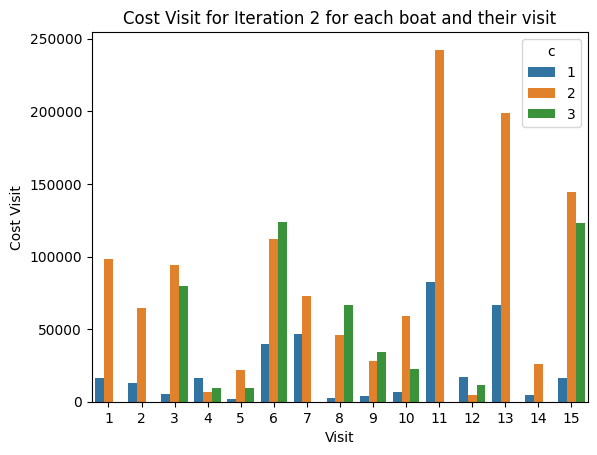

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the dataset to only include the desired iteration and boats
subset = dataset[(dataset['iter'] == iteration_number) & (dataset['n'] <= Nin)]

# Create a new figure and axis object
fig, ax = plt.subplots()

# Use seaborn's barplot function to create the plot
sns.barplot(x='n', y='cost_visit', hue='c', data=subset, ax=ax)

# Set the title and axis labels
ax.set_title(f"Cost Visit for Iteration {iteration_number} for each boat and their visit")
ax.set_xlabel("Visit")
ax.set_ylabel("Cost Visit")

# Show the plot
plt.show()


### The stacked costs now :

C:\Users\kerve\AppData\Local\Temp\ipykernel_35512\3078143974.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_iter[col] = df_iter[col].astype(int)


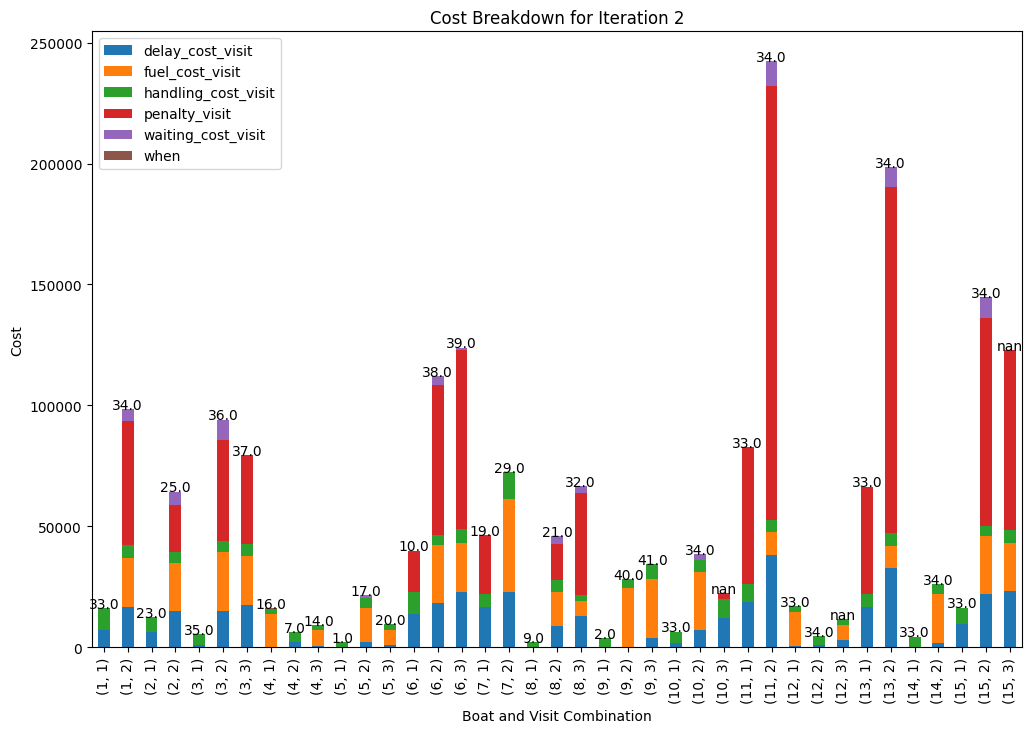

In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# filter dataset for selected iteration
df_iter = dataset[dataset['iter'] == iter_to_plot]

for col in ['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c']:
    df_iter[col] = df_iter[col].astype(int)

# create a pivot table to group data by boat and visit
df_pivot = pd.pivot_table(df_iter[['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'n', 'c', 'when']],
                           values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit', 'when'],
                           index=['n', 'c'])

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title(f'Cost Breakdown for Iteration {iter_to_plot}')



for i in range(0,len(ax.get_xticklabels())):
    p=ax.patches[i+5*len(ax.get_xticklabels())]
    _x = p.get_x() + p.get_width() / 2
    _y = p.get_y() + p.get_height()
    nc = ax.get_xticklabels()[i].get_text()
    ax.text(_x, _y, np.mean(df_iter[(df_iter['n']==int(nc.split(',')[0][1])) & (df_iter['c']==int(nc.split(',')[1][1]))]['when']), ha="center")
    


# show plot
plt.show()


### Now along all the iterations :

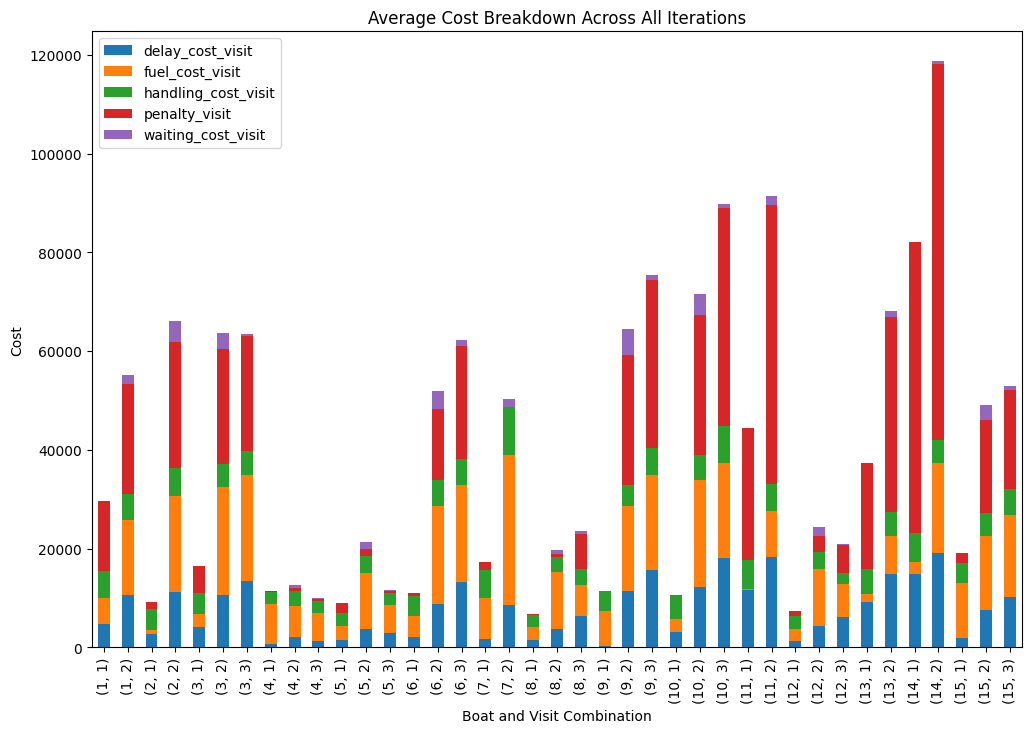

In [11]:
import pandas as pd
import matplotlib.pyplot as plt


# create a pivot table to group data by boat and visit, and calculate the mean of each cost across all iterations
df_pivot = pd.pivot_table(dataset, values=['delay_cost_visit', 'penalty_visit', 'fuel_cost_visit', 'handling_cost_visit', 'waiting_cost_visit'], index=['n', 'c'], aggfunc='mean')

# create stacked bar plot
ax = df_pivot.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Cost')
ax.set_title('Average Cost Breakdown Across All Iterations')

# show plot
plt.show()


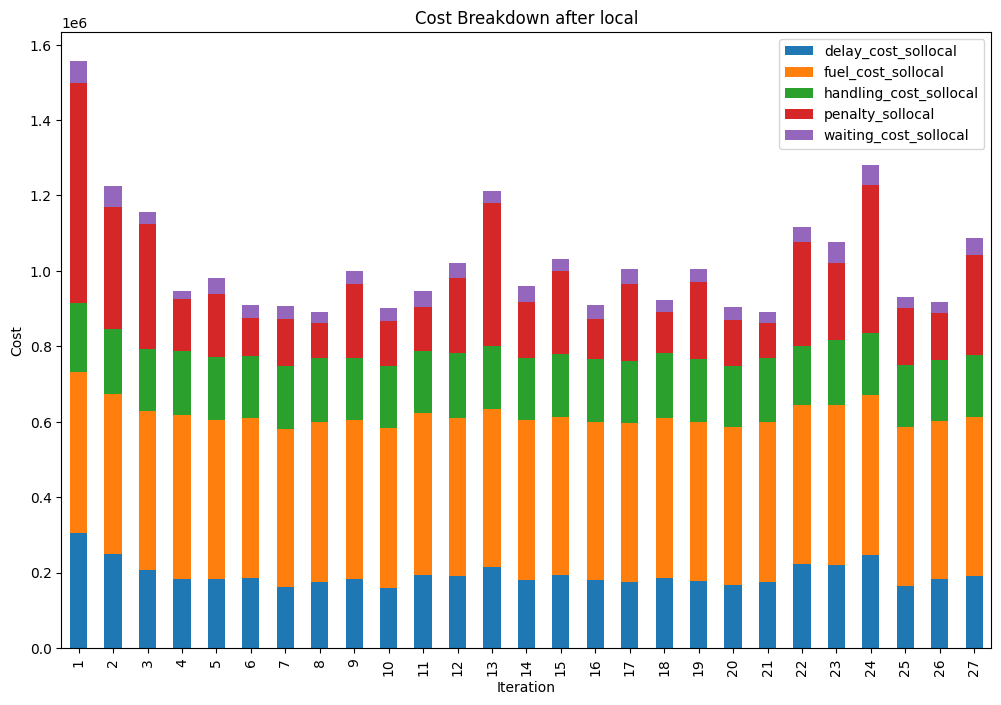

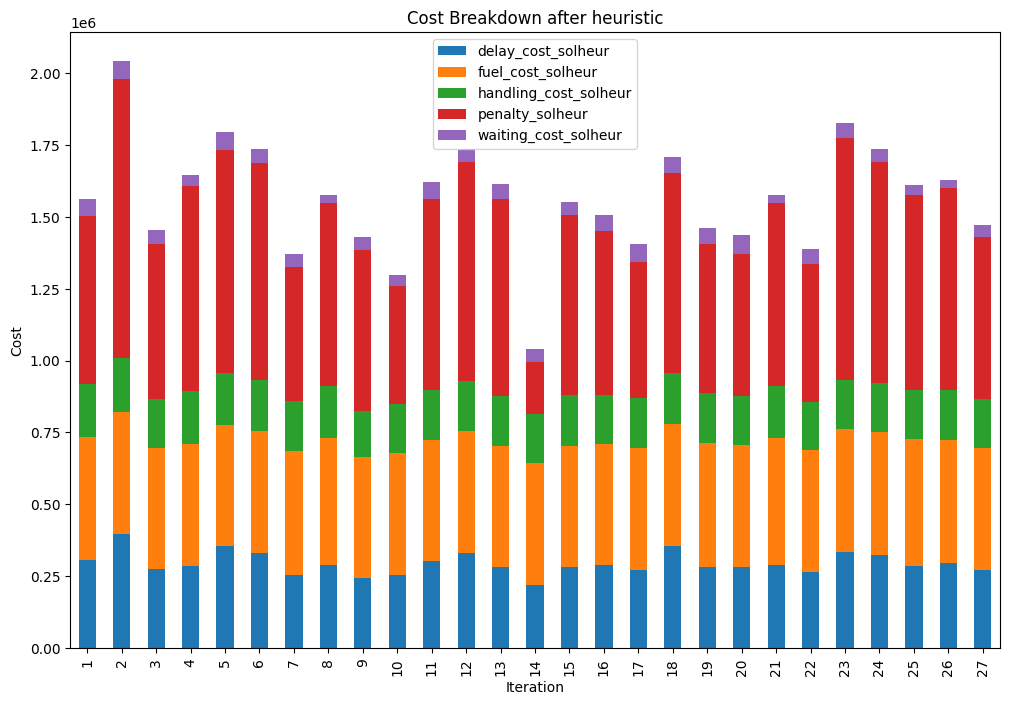

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# create dataset
dataset_subset = dataset[dataset['iter'] < nb_iter]
# create pivot table for solocal columns
df_pivot_solocal = pd.pivot_table(dataset_subset, values=['delay_cost_sollocal', 'penalty_sollocal', 'fuel_cost_sollocal', 'handling_cost_sollocal', 'waiting_cost_sollocal'], index=['iter'])

# create pivot table for solheur columns
df_pivot_solheur = pd.pivot_table(dataset_subset, values=['delay_cost_solheur', 'penalty_solheur', 'fuel_cost_solheur', 'handling_cost_solheur', 'waiting_cost_solheur'], index=['iter'])

# create stacked bar plot for solocal columns
ax1 = df_pivot_solocal.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solocal columns
ax1.set_xlabel('Iteration')
ax1.set_ylabel('Cost')
ax1.set_title('Cost Breakdown after local')

# create stacked bar plot for solheur columns
ax2 = df_pivot_solheur.plot(kind='bar', stacked=True, figsize=(12, 8))

# add labels and title for solheur columns
ax2.set_xlabel('Iteration')
ax2.set_ylabel('Cost')
ax2.set_title('Cost Breakdown after heuristic')

# show plots
plt.show()


## When are they appearing  ?

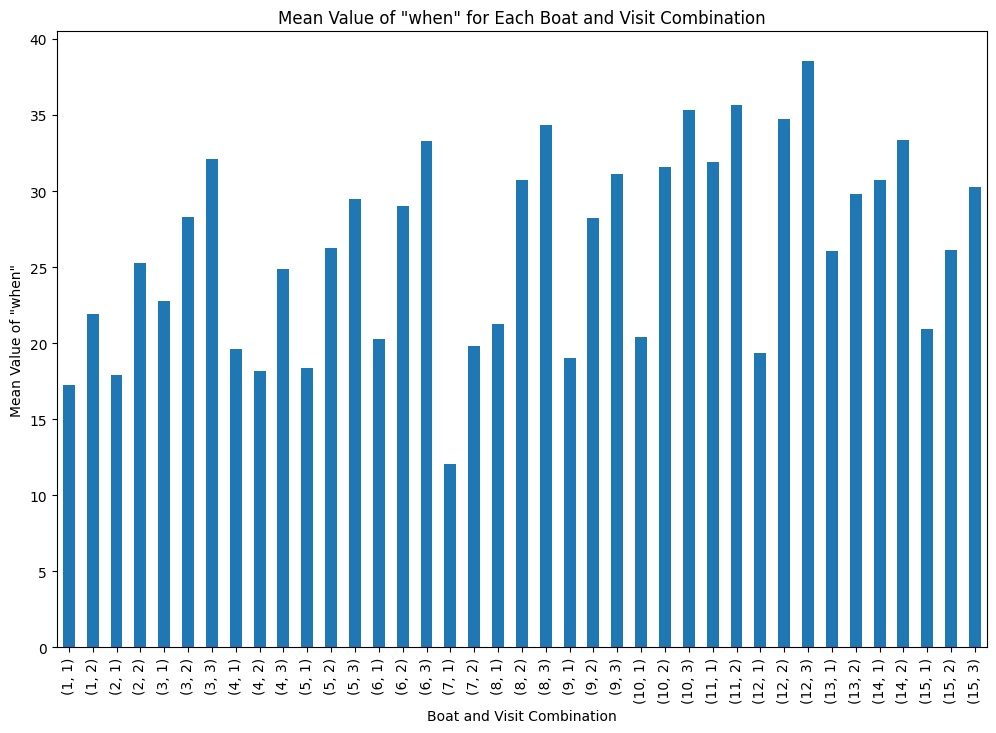

In [14]:
import pandas as pd
import matplotlib.pyplot as plt


# calculate mean of 'when' column for each n/c combination
df_mean_when = dataset.groupby(['n', 'c'])['when'].mean()

# create bar plot
ax = df_mean_when.plot(kind='bar', figsize=(12, 8))

# add labels and title
ax.set_xlabel('Boat and Visit Combination')
ax.set_ylabel('Mean Value of "when"')
ax.set_title('Mean Value of "when" for Each Boat and Visit Combination')

# show plot
plt.show()


### What times for the Heuristic and the Local search ?

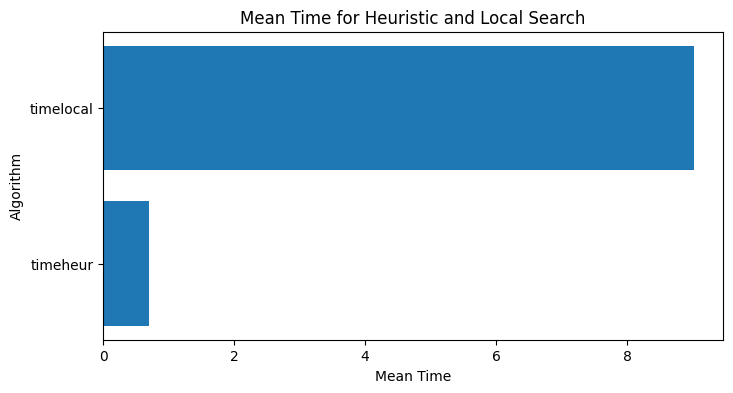

In [15]:
import pandas as pd
import matplotlib.pyplot as plt

# calculate mean of timeheur and timelocal across all iterations
mean_timeheur = dataset['timeheur'].mean()
mean_timelocal = dataset['timelocal'].mean()

# plot horizontal bar chart
fig, ax = plt.subplots(figsize=(8, 4))

ax.barh(['timeheur', 'timelocal'], [mean_timeheur, mean_timelocal])
ax.set_xlabel('Mean Time')
ax.set_ylabel('Algorithm')
ax.set_title('Mean Time for Heuristic and Local Search')

plt.show()
